In [1]:
#copied from https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load all the data
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target
#Split Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [3]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  #To find the mean and variance scalar to use
X_train_scaled = scaler.transform(X_train)  #then use that to scale the training set
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test) #use the same mean and variance found in scaler.fit to transfor test set

In [8]:
#Fit the data
#see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_train_scaled, y_train)

In [9]:
#Make predictions
y_pred=clf.predict(X_test_scaled)
print(clf.score(X_test_scaled, y_test))

0.9666666666666667


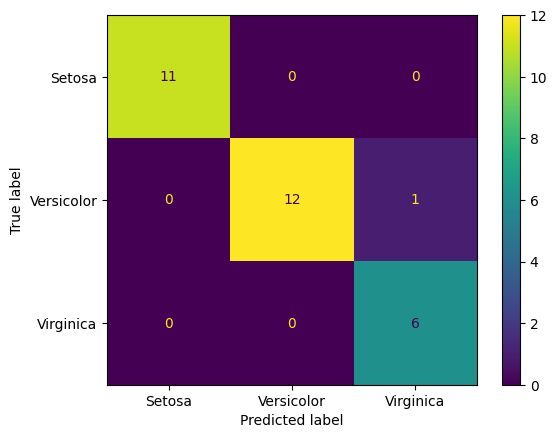

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Setosa","Versicolor","Virginica"])
disp.plot()
plt.show()

In [11]:
n_pre = 3
np.set_printoptions(precision=n_pre,suppress=True) #print with n_pre decimal places and suppress scientific notation
P = clf.predict_proba(X_test_scaled)
print("Probabilities: \n", P)

Probabilities: 
 [[1.    0.    0.   ]
 [0.001 0.999 0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.002 0.998]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.001 0.999]]
